In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr, spearmanr

In [2]:
salary = pd.read_csv("salary_cleaned.csv")

In [3]:
salary

,work_year,experience_level,exp_grade,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,comp_size_grade,usd_salary_zscore
0,2020,MI,2,Data Scientist,Scientist,70000,EUR,79833,DE,0,DE,L,3,-0.484534
1,2020,SE,3,Machine Learning Scientist,Scientist,260000,USD,260000,JP,0,JP,S,1,2.110883
2,2020,SE,3,Big Data Engineer,Engineer,85000,GBP,109024,GB,50,GB,M,2,-0.064020
3,2020,MI,2,Product Data Analyst,Analyst,20000,USD,20000,HN,0,HN,S,1,-1.346465
4,2020,SE,3,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,3,0.526265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,2022,SE,3,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,2,0.583887
558,2022,SE,3,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,2,0.180530
559,2022,SE,3,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,2,0.223747
560,2022,SE,3,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,2,0.526265


In [10]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           562 non-null    int64  
 1   experience_level    562 non-null    object 
 2   exp_grade           562 non-null    int64  
 3   job_title           562 non-null    object 
 4   job_type            562 non-null    object 
 5   salary              562 non-null    int64  
 6   salary_currency     562 non-null    object 
 7   salary_in_usd       562 non-null    int64  
 8   employee_residence  562 non-null    object 
 9   remote_ratio        562 non-null    int64  
 10  company_location    562 non-null    object 
 11  company_size        562 non-null    object 
 12  comp_size_grade     562 non-null    int64  
 13  usd_salary_zscore   562 non-null    float64
dtypes: float64(1), int64(6), object(7)
memory usage: 61.6+ KB


In [4]:
sns.set()

In [5]:
sns.set_style('whitegrid')

## Summary Statistics for Numerical Variables

### Work Year

In [6]:
salary.work_year.describe()

count     562.000000
mean     2021.444840
std         0.679192
min      2020.000000
25%      2021.000000
50%      2022.000000
75%      2022.000000
max      2022.000000
Name: work_year, dtype: float64

Text(0.5, 0, 'Work Year')

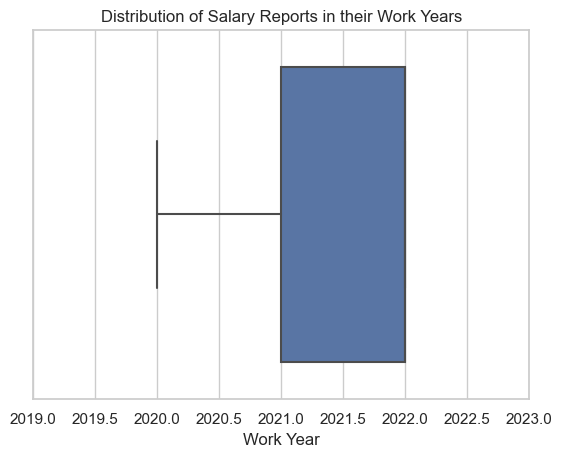

In [109]:
sns.boxplot(x = salary.work_year)
plt.xlim(2019, 2023)
plt.title('Distribution of Salary Reports in their Work Years')
plt.xlabel('Work Year')

In [27]:
salary.work_year.mean()

2021.4448398576512

In [28]:
salary.work_year.median()

2022.0

In [30]:
salary.work_year.min()

2020

In [31]:
salary.work_year.max()

2022

In [32]:
salary.work_year.std()

0.6791916601424964

WORK YEAR

- mean: 2021.4448398576512
- median:  2022
- min: 2020
- max: 2022
- standard deviation: 0.6791916601424964

### Experience (Grade Form)

In [33]:
salary.exp_grade.describe()

count    562.000000
mean       2.439502
std        0.760480
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: exp_grade, dtype: float64

Text(0.5, 0, 'Experience Level')

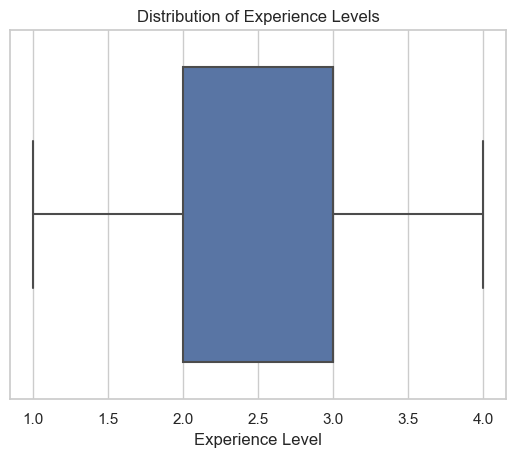

In [34]:
sns.boxplot(x = salary.exp_grade)
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')

In [65]:
salary.exp_grade.mean()

2.4395017793594307

In [66]:
salary.exp_grade.median()

3.0

In [67]:
salary.exp_grade.min()

1

In [68]:
salary.exp_grade.max()

4

In [69]:
salary.exp_grade.std()

0.7604800300539849

EXPERIENCE LEVEL

- mean: 2.4395017793594307
- median: 3
- min: 1
- max: 4
- standard deviation: 0.7604800300539849

### Salary (USD)

In [70]:
salary.salary_in_usd.describe()

count       562.000000
mean     111494.330961
std       55957.965880
min       16228.000000
25%       66448.750000
50%      104945.000000
75%      150000.000000
max      276000.000000
Name: salary_in_usd, dtype: float64

Text(0.5, 0, 'Annual Salaries')

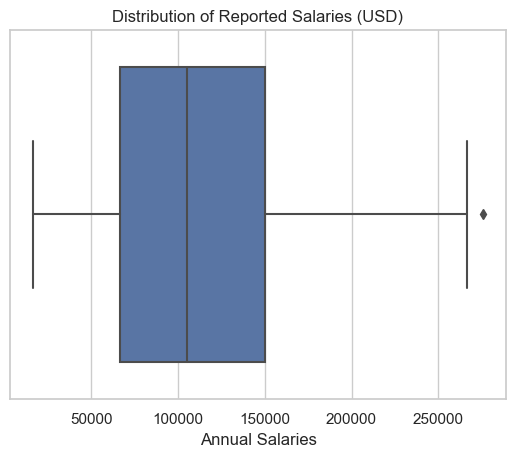

In [71]:
sns.boxplot(x = salary.salary_in_usd)
plt.title('Distribution of Reported Salaries (USD)')
plt.xlabel('Annual Salaries')

In [89]:
salary.salary_in_usd.mean()

111494.33096085409

In [90]:
salary.salary_in_usd.median()

104945.0

In [91]:
salary.salary_in_usd.min()

16228

In [92]:
salary.salary_in_usd.max()

276000

In [93]:
salary.salary_in_usd.std()

55957.96588047395

SALARY

- mean: 111,494.33096085409
- median: 104,945
- min: 16,228
- max: 276,000
- standard deviation: 55,957.96588047395

### Remote Ratio

In [77]:
salary.remote_ratio.describe()

count    562.000000
mean      71.085409
std       40.773228
min        0.000000
25%       50.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: remote_ratio, dtype: float64

Text(0.5, 0, 'Ratio of Working Remote')

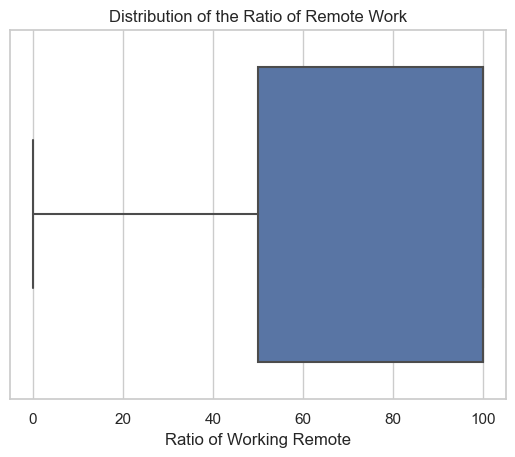

In [107]:
sns.boxplot(x = salary.remote_ratio)
plt.title('Distribution of the Ratio of Remote Work')
plt.xlabel('Ratio of Working Remote')

In [94]:
salary.remote_ratio.mean()

71.08540925266904

In [95]:
salary.remote_ratio.median()

100.0

In [96]:
salary.remote_ratio.min()

0

In [98]:
salary.remote_ratio.max()

100

In [99]:
salary.remote_ratio.std()

40.77322835350361

REMOTE RATIO

- mean: 71.08540925266904
- median: 100
- min: 0
- max: 100
- standard deviation: 40.77322835350361

### Company Size

In [83]:
salary.comp_size_grade.describe()

count    562.000000
mean       2.197509
std        0.639012
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: comp_size_grade, dtype: float64

Text(0.5, 0, 'Company Size')

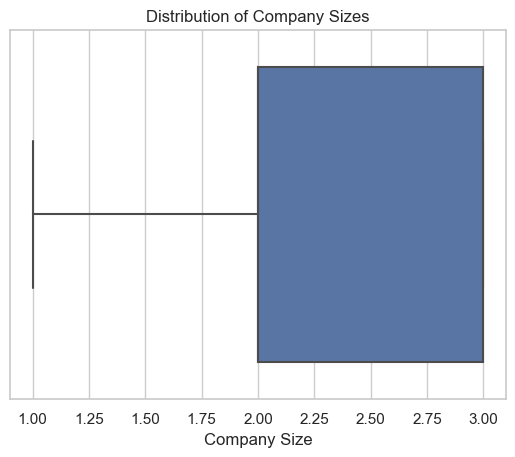

In [108]:
sns.boxplot(x = salary.comp_size_grade)
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')

In [100]:
salary.comp_size_grade.mean()

2.197508896797153

In [101]:
salary.comp_size_grade.median()

2.0

In [102]:
salary.comp_size_grade.min()

1

In [103]:
salary.comp_size_grade.max()

3

In [104]:
salary.comp_size_grade.std()

0.6390117599328403

COMPANY SIZE

- mean: 2.197508896797153
- median: 2
- min: 1
- max: 3
- standard deviation: 0.6390117599328403

## Summary Statistics by Categories

In [231]:
salary

,work_year,experience_level,exp_grade,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,comp_size_grade
0,2020,MI,2,Data Scientist,Scientist,70000,EUR,79833,DE,0,DE,L,3
1,2020,SE,3,Machine Learning Scientist,Scientist,260000,USD,260000,JP,0,JP,S,1
2,2020,SE,3,Big Data Engineer,Engineer,85000,GBP,109024,GB,50,GB,M,2
3,2020,MI,2,Product Data Analyst,Analyst,20000,USD,20000,HN,0,HN,S,1
4,2020,SE,3,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,2022,SE,3,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,2
558,2022,SE,3,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,2
559,2022,SE,3,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,2
560,2022,SE,3,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,2


#### Work Year

In [119]:
salary.groupby(salary.work_year).describe()

exp_grade                                              salary  \
              count      mean       std  min  25%  50%  75%  max  count   
work_year                                                                 
2020           60.0  2.066667  0.756142  1.0  2.0  2.0  3.0  4.0   60.0   
2021          192.0  2.239583  0.828103  1.0  2.0  2.0  3.0  4.0  192.0   
2022          310.0  2.635484  0.653122  1.0  2.0  3.0  3.0  4.0  310.0   

                          ... comp_size_grade      usd_salary_zscore  \
                    mean  ...             75%  max             count   
work_year                 ...                                          
2020       413513.483333  ...             3.0  3.0              60.0   
2021       592057.088542  ...             3.0  3.0             192.0   
2022       158416.890323  ...             2.0  3.0             310.0   

                                                                       \
               mean       std       min       25%       50%       75%   
work_year                                                               
2020      -0.319333  0.739541 -1.346465 -0.929772 -0.484534  0.029646   
2021      -0.209802  0.835600 -1.400803 -0.818968 -0.357462  0.328188   
2022       0.140202  0.760484 -1.368909 -0.453684  0.094096  0.670321   

                     
                max  
work_year            
2020       2.110883  
2021       2.341373  
2022       2.203079  

[3 rows x 48 columns]

Text(0, 0.5, 'Salary (USD)')

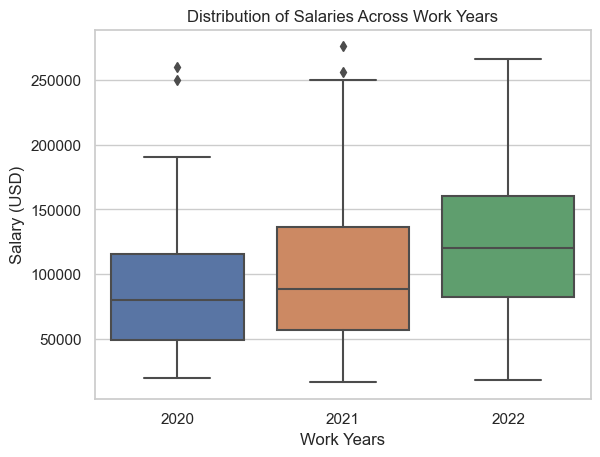

In [127]:
sns.boxplot(x = salary.work_year, y = salary.salary_in_usd)
plt.title('Distribution of Salaries Across Work Years')
plt.xlabel('Work Years')
plt.ylabel('Salary (USD)')

### Experience Level

In [120]:
salary.groupby(salary.experience_level).describe()

work_year                                                 \
                     count         mean       std     min     25%     50%   
experience_level                                                            
EN                    71.0  2021.056338  0.673738  2020.0  2021.0  2021.0   
EX                    22.0  2021.500000  0.597614  2020.0  2021.0  2022.0   
MI                   195.0  2021.307692  0.716299  2020.0  2021.0  2021.0   
SE                   274.0  2021.638686  0.590616  2020.0  2021.0  2022.0   

                                 exp_grade       ... comp_size_grade       \
                     75%     max     count mean  ...             75%  max   
experience_level                                 ...                        
EN                2021.5  2022.0      71.0  1.0  ...             3.0  3.0   
EX                2022.0  2022.0      22.0  4.0  ...             3.0  3.0   
MI                2022.0  2022.0     195.0  2.0  ...             3.0  3.0   
SE                2022.0  2022.0     274.0  3.0  ...             2.0  3.0   

                 usd_salary_zscore                                          \
                             count      mean       std       min       25%   
experience_level                                                             
EN                            71.0 -0.614456  0.611870 -1.400803 -1.002121   
EX                            22.0  0.669793  0.830103 -0.629915  0.110522   
MI                           195.0 -0.391486  0.643500 -1.391065 -0.895692   
SE                           274.0  0.325735  0.737169 -1.362211 -0.194016   

                                                
                       50%       75%       max  
experience_level                                
EN               -0.715053 -0.338072  1.966827  
EX                0.552678  1.419413  1.966827  
MI               -0.503362 -0.018988  1.837176  
SE                0.310181  0.814377  2.341373  

[4 rows x 56 columns]

Text(0, 0.5, 'Salary (USD)')

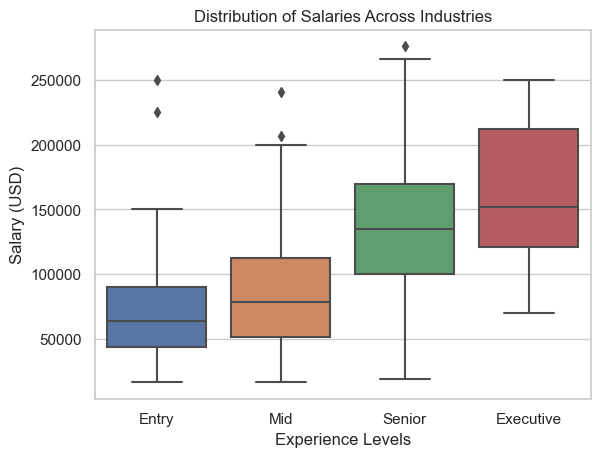

In [128]:
sns.boxplot(x = salary.exp_grade, y = salary.salary_in_usd)
plt.title('Distribution of Salaries Across Industries')
plt.xticks([0, 1, 2, 3], ['Entry', 'Mid', 'Senior', 'Executive'])
plt.xlabel('Experience Levels')
plt.ylabel('Salary (USD)')

### Job Type

In [134]:
salary.groupby(salary.job_type).describe()

work_year                                                 \
                      count         mean       std     min     25%     50%   
job_type                                                                     
Analyst               111.0  2021.621622  0.618709  2020.0  2021.0  2022.0   
Architect              12.0  2021.666667  0.492366  2021.0  2021.0  2022.0   
Consultant              6.0  2020.833333  0.408248  2020.0  2021.0  2021.0   
Developer               5.0  2021.800000  0.447214  2021.0  2022.0  2022.0   
Engineer              210.0  2021.457143  0.678142  2020.0  2021.0  2022.0   
Manager/Executive      43.0  2021.255814  0.620791  2020.0  2021.0  2021.0   
Scientist             175.0  2021.360000  0.720472  2020.0  2021.0  2022.0   

                                  exp_grade            ... comp_size_grade  \
                      75%     max     count      mean  ...             75%   
job_type                                               ...                   
Analyst            2022.0  2022.0     111.0  2.468468  ...            2.00   
Architect          2022.0  2022.0      12.0  2.750000  ...            2.25   
Consultant         2021.0  2021.0       6.0  1.666667  ...            3.00   
Developer          2022.0  2022.0       5.0  2.000000  ...            2.00   
Engineer           2022.0  2022.0     210.0  2.414286  ...            3.00   
Manager/Executive  2022.0  2022.0      43.0  3.162791  ...            3.00   
Scientist          2022.0  2022.0     175.0  2.291429  ...            3.00   

                       usd_salary_zscore                                \
                   max             count      mean       std       min   
job_type                                                                 
Analyst            3.0             111.0 -0.273042  0.558708 -1.368909   
Architect          3.0              12.0  0.833964  0.707061 -0.327988   
Consultant         3.0               6.0 -0.481557  0.205323 -0.715053   
Developer          2.0               5.0 -0.575776  0.273889 -0.842888   
Engineer           3.0             210.0 -0.050271  0.838020 -1.400803   
Manager/Executive  3.0              43.0  0.490701  0.760083 -1.159567   
Scientist          3.0             175.0 -0.002595  0.840960 -1.391065   

                                                           
                        25%       50%       75%       max  
job_type                                                   
Analyst           -0.728241 -0.333462  0.070687  1.246546  
Architect          0.483963  0.886405  1.197808  2.203079  
Consultant        -0.604374 -0.527751 -0.385492 -0.150799  
Developer         -0.842888 -0.499545 -0.499545 -0.194016  
Engineer          -0.690063 -0.176945  0.590370  2.341373  
Manager/Executive -0.024923  0.526265  0.872000  1.966827  
Scientist         -0.730971 -0.049427  0.526265  2.110883  

[7 rows x 56 columns]

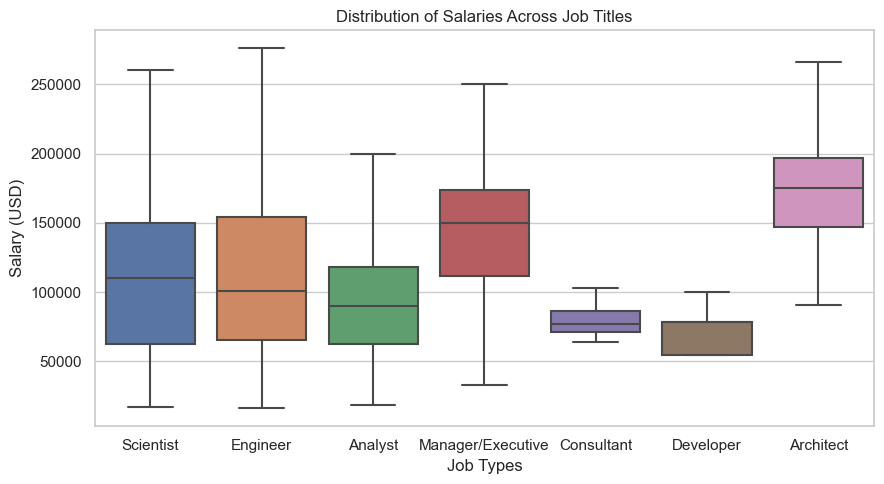

In [139]:
plt.figure(figsize=(9,5))
sns.boxplot(x = salary.job_type, y = salary.salary_in_usd)
plt.title('Distribution of Salaries Across Job Titles')
plt.xlabel('Job Types')
plt.ylabel('Salary (USD)')
plt.tight_layout()

### Employee Residence

In [140]:
salary.groupby(salary.employee_residence).describe()

work_year                                                  \
                       count         mean       std     min      25%     50%   
employee_residence                                                             
AE                       3.0  2021.333333  1.154701  2020.0  2021.00  2022.0   
AR                       1.0  2022.000000       NaN  2022.0  2022.00  2022.0   
AT                       3.0  2020.666667  1.154701  2020.0  2020.00  2020.0   
AU                       3.0  2022.000000  0.000000  2022.0  2022.00  2022.0   
BE                       2.0  2021.000000  0.000000  2021.0  2021.00  2021.0   
BG                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
BO                       1.0  2022.000000       NaN  2022.0  2022.00  2022.0   
BR                       4.0  2021.250000  0.500000  2021.0  2021.00  2021.0   
CA                      28.0  2021.607143  0.566947  2020.0  2021.00  2022.0   
CH                       1.0  2022.000000       NaN  2022.0  2022.00  2022.0   
CL                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
CN                       1.0  2020.000000       NaN  2020.0  2020.00  2020.0   
CO                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
CZ                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
DE                      23.0  2020.869565  0.548083  2020.0  2021.00  2021.0   
DK                       1.0  2020.000000       NaN  2020.0  2020.00  2020.0   
EE                       1.0  2022.000000       NaN  2022.0  2022.00  2022.0   
ES                      14.0  2021.214286  0.801784  2020.0  2021.00  2021.0   
FR                      18.0  2020.833333  0.707107  2020.0  2020.00  2021.0   
GB                      44.0  2021.590909  0.622007  2020.0  2021.00  2022.0   
GR                      13.0  2021.538462  0.776250  2020.0  2021.00  2022.0   
HK                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
HN                       1.0  2020.000000       NaN  2020.0  2020.00  2020.0   
HR                       1.0  2020.000000       NaN  2020.0  2020.00  2020.0   
HU                       2.0  2020.500000  0.707107  2020.0  2020.25  2020.5   
IE                       1.0  2022.000000       NaN  2022.0  2022.00  2022.0   
IN                      23.0  2021.173913  0.491026  2020.0  2021.00  2021.0   
IQ                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
IT                       2.0  2021.000000  0.000000  2021.0  2021.00  2021.0   
JE                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
JP                       7.0  2020.857143  0.690066  2020.0  2020.50  2021.0   
LU                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
MD                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
MT                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
MX                       1.0  2020.000000       NaN  2020.0  2020.00  2020.0   
MY                       1.0  2022.000000       NaN  2022.0  2022.00  2022.0   
NG                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
NL                       4.0  2021.000000  0.816497  2020.0  2020.75  2021.0   
NZ                       1.0  2020.000000       NaN  2020.0  2020.00  2020.0   
PH                       1.0  2020.000000       NaN  2020.0  2020.00  2020.0   
PK                       3.0  2021.333333  1.154701  2020.0  2021.00  2022.0   
PL                       4.0  2021.000000  0.816497  2020.0  2020.75  2021.0   
PR                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
PT                       5.0  2021.000000  1.000000  2020.0  2020.00  2021.0   
RO                       2.0  2021.000000  0.000000  2021.0  2021.00  2021.0   
RS                       1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
RU                       3.0  2021.333333  0.577350  2021.0  2021.00  2021.0   
SG                 

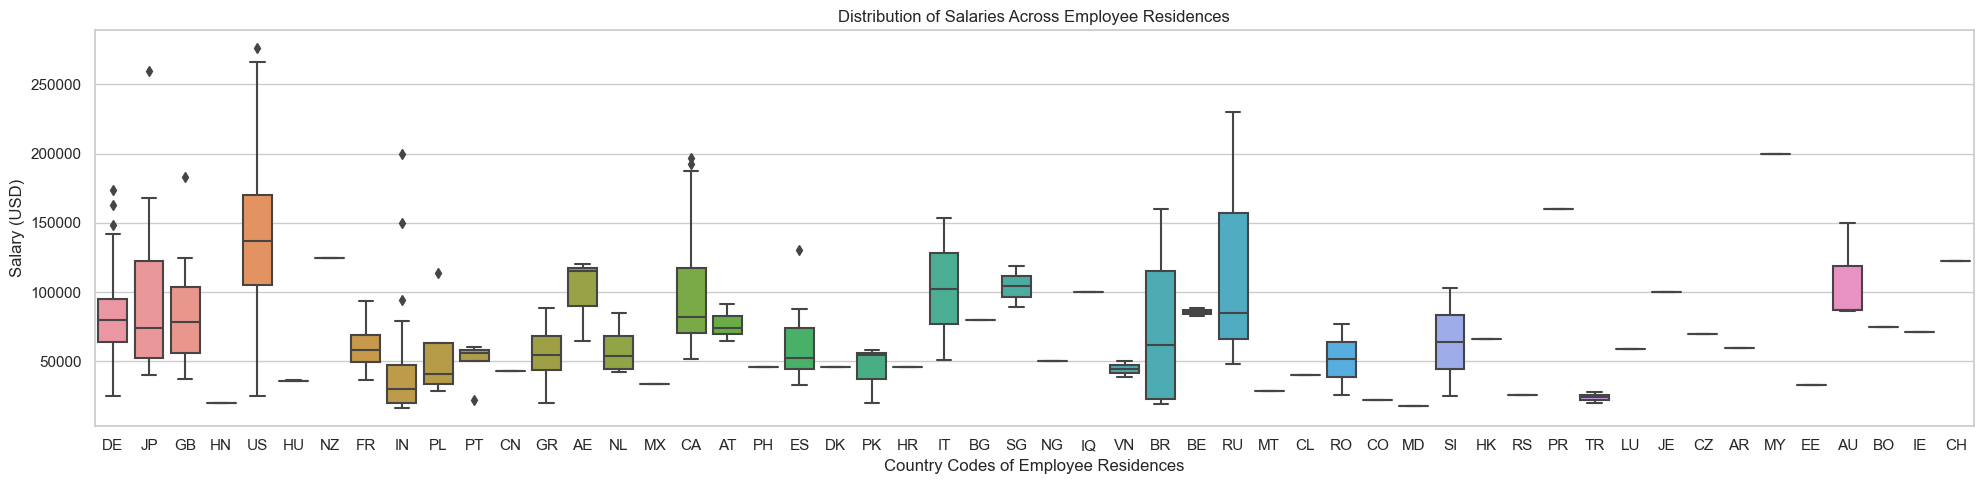

In [145]:
plt.figure(figsize=(20,5))
sns.boxplot(x = salary.employee_residence, y = salary.salary_in_usd)
plt.title('Distribution of Salaries Across Employee Residences')
plt.xlabel('Country Codes of Employee Residences')
plt.ylabel('Salary (USD)')
plt.tight_layout()

### Company Location

In [141]:
salary.groupby(salary.company_location).describe()

work_year                                                  \
                     count         mean       std     min      25%     50%   
company_location                                                             
AE                     3.0  2021.333333  1.154701  2020.0  2021.00  2022.0   
AS                     1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
AT                     4.0  2020.750000  0.957427  2020.0  2020.00  2020.5   
AU                     3.0  2022.000000  0.000000  2022.0  2022.00  2022.0   
BE                     2.0  2021.000000  0.000000  2021.0  2021.00  2021.0   
BR                     2.0  2021.000000  0.000000  2021.0  2021.00  2021.0   
CA                    30.0  2021.566667  0.568321  2020.0  2021.00  2022.0   
CH                     1.0  2022.000000       NaN  2022.0  2022.00  2022.0   
CL                     1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
CN                     2.0  2020.500000  0.707107  2020.0  2020.25  2020.5   
CO                     1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
CZ                     1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
DE                    26.0  2020.923077  0.627572  2020.0  2021.00  2021.0   
DK                     2.0  2020.500000  0.707107  2020.0  2020.25  2020.5   
EE                     1.0  2022.000000       NaN  2022.0  2022.00  2022.0   
ES                    13.0  2021.307692  0.751068  2020.0  2021.00  2021.0   
FR                    15.0  2020.800000  0.676123  2020.0  2020.00  2021.0   
GB                    47.0  2021.531915  0.654452  2020.0  2021.00  2022.0   
GR                    11.0  2021.727273  0.646670  2020.0  2022.00  2022.0   
HN                     1.0  2020.000000       NaN  2020.0  2020.00  2020.0   
HR                     1.0  2020.000000       NaN  2020.0  2020.00  2020.0   
HU                     1.0  2020.000000       NaN  2020.0  2020.00  2020.0   
IE                     1.0  2022.000000       NaN  2022.0  2022.00  2022.0   
IL                     1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
IN                    19.0  2021.157895  0.501460  2020.0  2021.00  2021.0   
IQ                     1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
IT                     1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
JP                     6.0  2020.666667  0.516398  2020.0  2020.25  2021.0   
LU                     2.0  2020.500000  0.707107  2020.0  2020.25  2020.5   
MD                     1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
MT                     1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
MX                     2.0  2021.000000  1.414214  2020.0  2020.50  2021.0   
MY                     1.0  2022.000000       NaN  2022.0  2022.00  2022.0   
NG                     1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
NL                     3.0  2021.000000  1.000000  2020.0  2020.50  2021.0   
NZ                     1.0  2020.000000       NaN  2020.0  2020.00  2020.0   
PK                     1.0  2022.000000       NaN  2022.0  2022.00  2022.0   
PL                     4.0  2021.250000  0.500000  2021.0  2021.00  2021.0   
PT                     4.0  2021.250000  0.957427  2020.0  2020.75  2021.5   
RO                     1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
RU                     2.0  2021.000000  0.000000  2021.0  2021.00  2021.0   
SG                     1.0  2021.000000       NaN  2021.0  2021.00  2021.0   
SI                     2.0  2021.000000  0.000000  2021.0  2021.00  2021.0   
TR                     2.0  2021.000000  0.000000  2021.0  2021.00  2021.0   
US                   335.0  2021.588060  0.626635  2020.0  2021.00  2022.0   

                                  exp_grade            ... comp_size_grade  \
                      75%     max     count      mean  ...             75%   
company_location                                       ...                   
AE                2022.00  2022.0     

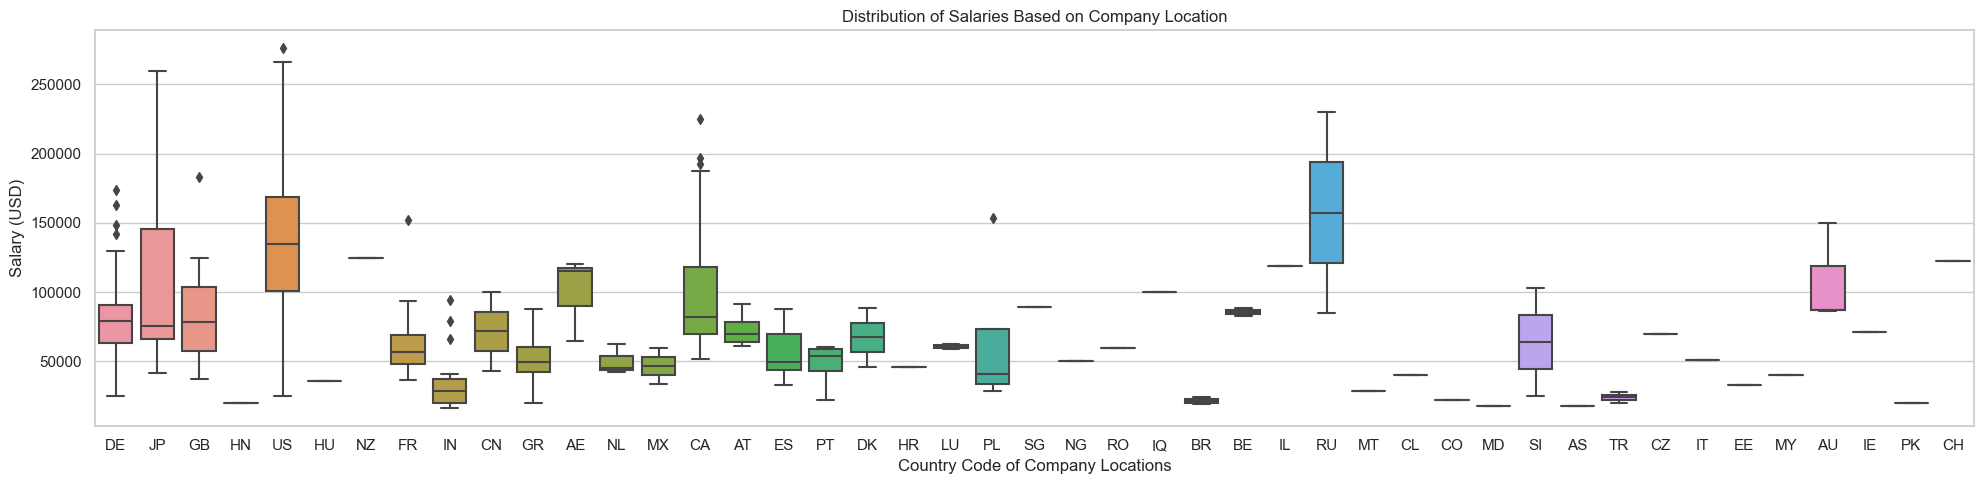

In [146]:
plt.figure(figsize=(20,5))
sns.boxplot(x = salary.company_location, y = salary.salary_in_usd)
plt.title('Distribution of Salaries Based on Company Location')
plt.xlabel('Country Code of Company Locations')
plt.ylabel('Salary (USD)')
plt.tight_layout()

### Remote Ratio

In [121]:
salary.groupby(salary.remote_ratio).describe()

work_year                                                         \
                 count         mean       std     min     25%     50%     75%   
remote_ratio                                                                    
0                118.0  2021.550847  0.686842  2020.0  2021.0  2022.0  2022.0   
50                89.0  2020.910112  0.556786  2020.0  2021.0  2021.0  2021.0   
100              355.0  2021.543662  0.642368  2020.0  2021.0  2022.0  2022.0   

                     exp_grade            ... comp_size_grade       \
                 max     count      mean  ...             75%  max   
remote_ratio                              ...                        
0             2022.0     118.0  2.415254  ...            2.75  3.0   
50            2022.0      89.0  2.191011  ...            3.00  3.0   
100           2022.0     355.0  2.509859  ...            3.00  3.0   

             usd_salary_zscore                                          \
                         count      mean       std       min       25%   
remote_ratio                                                             
0                        118.0 -0.049501  0.823592 -1.375277 -0.688924   
50                        89.0 -0.447850  0.635876 -1.344002 -0.853246   
100                      355.0  0.083720  0.805047 -1.400803 -0.503362   

                                            
                   50%       75%       max  
remote_ratio                                
0            -0.194016  0.387971  2.341373  
50           -0.594319 -0.194016  1.966827  
100           0.029271  0.635748  2.203079  

[3 rows x 48 columns]

Text(0, 0.5, 'Salary (USD)')

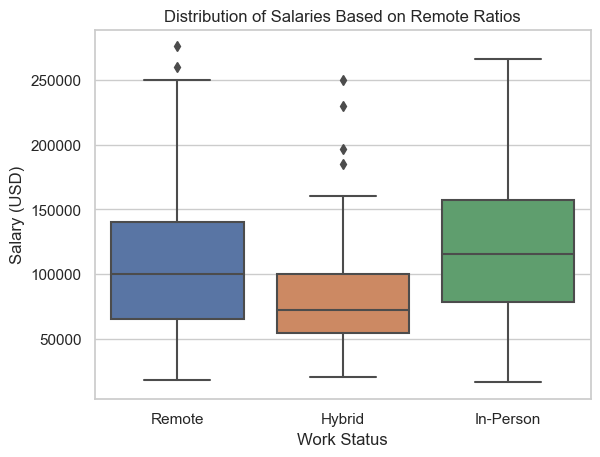

In [129]:
sns.boxplot(x = salary.remote_ratio, y = salary.salary_in_usd)
plt.title('Distribution of Salaries Based on Remote Ratios')
plt.xticks([0, 1, 2], ['Remote', 'Hybrid', 'In-Person'])
plt.xlabel('Work Status')
plt.ylabel('Salary (USD)')

### Company Size

In [132]:
salary.groupby(salary.company_size).describe()

work_year                                                         \
                 count         mean       std     min     25%     50%     75%   
company_size                                                                    
L                181.0  2021.082873  0.622526  2020.0  2021.0  2021.0  2021.0   
M                311.0  2021.778135  0.500617  2020.0  2022.0  2022.0  2022.0   
S                 70.0  2020.900000  0.684190  2020.0  2020.0  2021.0  2021.0   

                     exp_grade            ... comp_size_grade       \
                 max     count      mean  ...             75%  max   
company_size                              ...                        
L             2022.0     181.0  2.331492  ...             3.0  3.0   
M             2022.0     311.0  2.591640  ...             2.0  2.0   
S             2022.0      70.0  2.042857  ...             1.0  1.0   

             usd_salary_zscore                                          \
                         count      mean       std       min       25%   
company_size                                                             
L                        181.0 -0.050592  0.862580 -1.400803 -0.741429   
M                        311.0  0.075788  0.764685 -1.368909 -0.490836   
S                         70.0 -0.434174  0.705626 -1.391065 -0.909539   

                                            
                   50%       75%       max  
company_size                                
L            -0.194016  0.540671  2.341373  
M             0.035523  0.591090  2.203079  
S            -0.540954 -0.128614  2.110883  

[3 rows x 56 columns]

Text(0, 0.5, 'Salary (USD)')

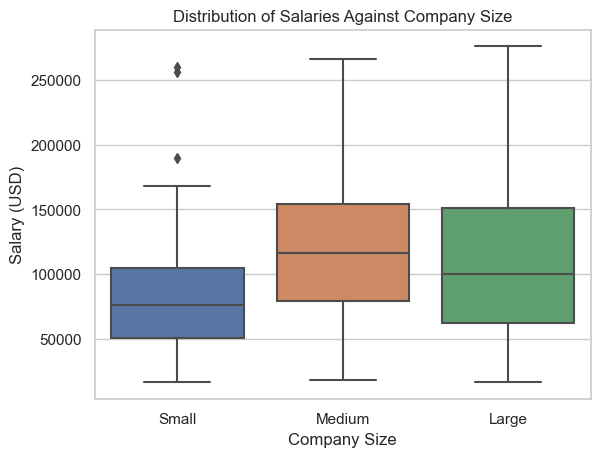

In [130]:
sns.boxplot(x = salary.comp_size_grade, y = salary.salary_in_usd)
plt.title('Distribution of Salaries Against Company Size')
plt.xticks([0, 1, 2], ['Small', 'Medium', 'Large'])
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')

## Comparing Categorical Variables and Finding Relationships to Answer Questions

In [133]:
salary

,work_year,experience_level,exp_grade,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,comp_size_grade,usd_salary_zscore
0,2020,MI,2,Data Scientist,Scientist,70000,EUR,79833,DE,0,DE,L,3,-0.484534
1,2020,SE,3,Machine Learning Scientist,Scientist,260000,USD,260000,JP,0,JP,S,1,2.110883
2,2020,SE,3,Big Data Engineer,Engineer,85000,GBP,109024,GB,50,GB,M,2,-0.064020
3,2020,MI,2,Product Data Analyst,Analyst,20000,USD,20000,HN,0,HN,S,1,-1.346465
4,2020,SE,3,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,3,0.526265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,2022,SE,3,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,2,0.583887
558,2022,SE,3,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,2,0.180530
559,2022,SE,3,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,2,0.223747
560,2022,SE,3,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,2,0.526265


In [168]:
salary.salary_in_usd.groupby(salary.job_type).describe()

,count,mean,std,min,25%,50%,75%,max
job_type,,,,,,,,
Analyst,111.0,94514.189189,38784.012333,18442.0,62915.50,90320.0,118375.00,200000.0
Architect,12.0,171359.666667,49082.328170,90700.0,147063.50,175000.0,196616.75,266400.0
Consultant,6.0,80039.666667,14252.957443,63831.0,71514.00,76833.0,86708.25,103000.0
Developer,5.0,73499.200000,19012.660629,54957.0,54957.00,78791.0,78791.00,100000.0
Engineer,210.0,109978.366667,58173.158577,16228.0,65565.75,101185.0,154450.00,276000.0
Manager/Executive,43.0,147531.232558,52762.975275,32974.0,111738.00,150000.0,174000.00,250000.0
Scientist,175.0,113287.937143,58377.201543,16904.0,62726.00,110037.0,150000.00,260000.0


Text(0, 0.5, 'Salary (USD)')

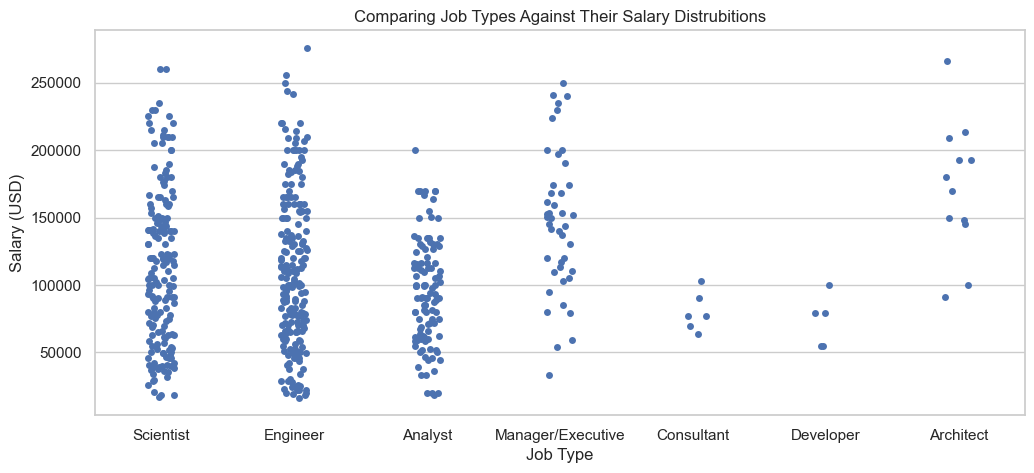

In [236]:
plt.figure(figsize=(12,5))
sns.stripplot(x = salary.job_type, y = salary.salary_in_usd)
plt.title('Comparing Job Types Against Their Salary Distrubitions')
plt.xlabel('Job Type')
plt.ylabel('Salary (USD)')

Text(0, 0.5, 'Salary (USD)')

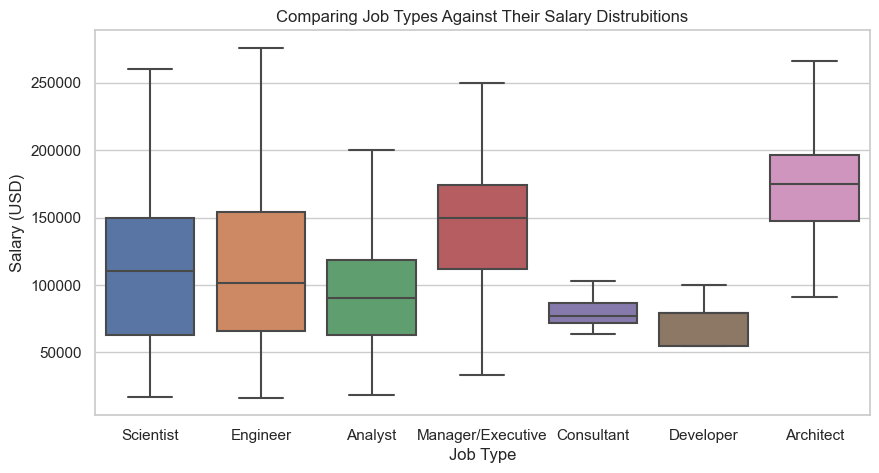

In [237]:
plt.figure(figsize=(10,5))
sns.boxplot(x = salary.job_type, y = salary.salary_in_usd)
plt.title('Comparing Job Types Against Their Salary Distrubitions')
plt.xlabel('Job Type')
plt.ylabel('Salary (USD)')

In [187]:
salary.remote_ratio.groupby(salary.job_type).describe()

,count,mean,std,min,25%,50%,75%,max
job_type,,,,,,,,
Analyst,111.0,76.126126,40.365854,0.0,50.0,100.0,100.0,100.0
Architect,12.0,95.833333,14.433757,50.0,100.0,100.0,100.0,100.0
Consultant,6.0,75.000000,41.833001,0.0,62.5,100.0,100.0,100.0
Developer,5.0,50.000000,50.000000,0.0,0.0,50.0,100.0,100.0
Engineer,210.0,71.904762,40.584138,0.0,50.0,100.0,100.0,100.0
Manager/Executive,43.0,72.093023,39.794600,0.0,50.0,100.0,100.0,100.0
Scientist,175.0,65.428571,41.753440,0.0,50.0,100.0,100.0,100.0


In [186]:
pd.crosstab(index = salary.job_type, columns = salary.remote_ratio)

remote_ratio,0,50,100
job_type,,,
Analyst,22,9,80
Architect,0,1,11
Consultant,1,1,4
Developer,2,1,2
Engineer,43,32,135
Manager/Executive,8,8,27
Scientist,42,37,96


Text(0, 0.5, 'Remote Ratios')

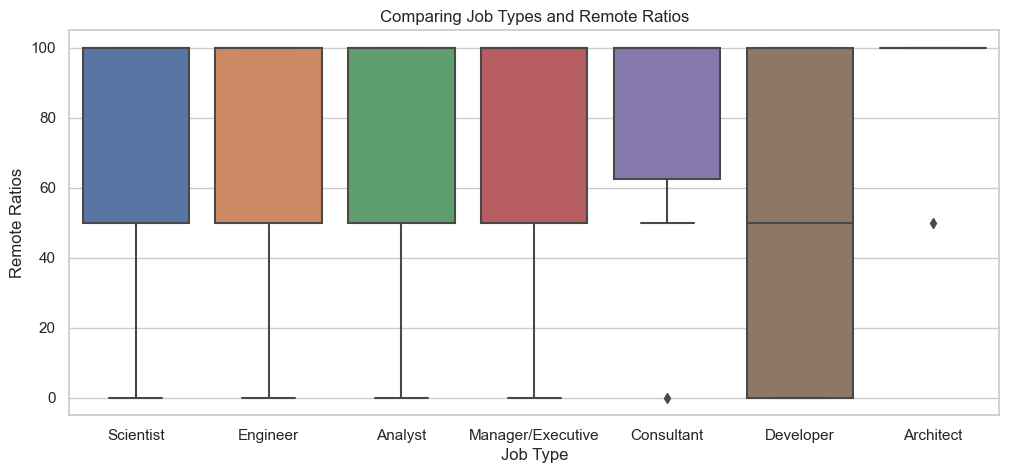

In [238]:
plt.figure(figsize=(12,5))
sns.boxplot(x = salary.job_type, y = salary.remote_ratio)
plt.title('Comparing Job Types and Remote Ratios')
plt.xlabel('Job Type')
plt.ylabel('Remote Ratios')

<Axes: xlabel='job_type', ylabel='remote_ratio'>

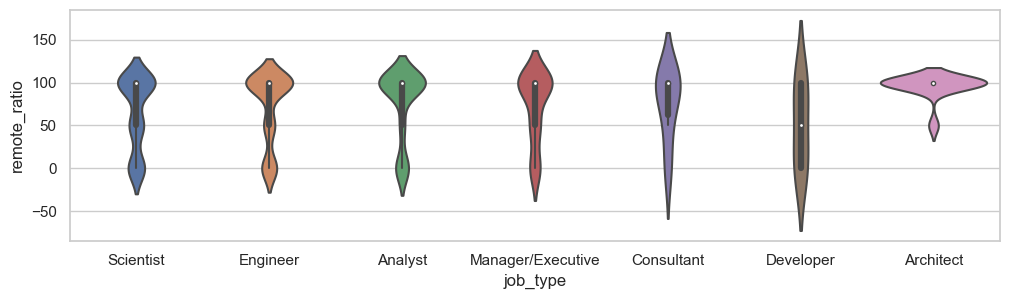

In [233]:
plt.figure(figsize=(12,3))
sns.violinplot(x = salary.job_type, y = salary.remote_ratio)

In [232]:
salary.salary_in_usd.groupby(salary.remote_ratio).describe()

,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,118.0,110031.813559,57171.577339,18000.0,65644.75,100000.0,140400.0,276000.0
50,89.0,82379.494382,44140.864180,20171.0,54238.00,72212.0,100000.0,250000.0
100,355.0,119279.676056,55884.209582,16228.0,78526.00,115500.0,157600.0,266400.0


Text(0, 0.5, 'Salary (USD)')

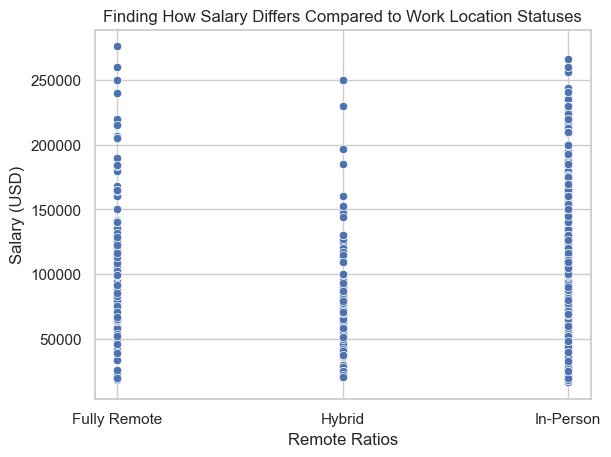

In [240]:
sns.scatterplot(x = salary.remote_ratio, y = salary.salary_in_usd)
plt.title('Finding How Salary Differs Compared to Work Location Statuses')
plt.xticks([0, 50, 100], ['Fully Remote', 'Hybrid', 'In-Person'])
plt.xlabel('Remote Ratios')
plt.ylabel('Salary (USD)')

In [195]:
salary.drop(columns = ['usd_salary_zscore'], inplace = True)

In [198]:
salary.corr()

/var/folders/_j/fzbq3gvn0cx_99l539dvts7h0000gp/T/ipykernel_48695/3980231313.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  salary.corr()


,work_year,exp_grade,salary,salary_in_usd,remote_ratio,comp_size_grade
work_year,1.000000,0.286871,-0.096802,0.227026,0.072649,-0.112441
exp_grade,0.286871,1.000000,-0.038950,0.492488,0.080017,0.030135
salary,-0.096802,-0.038950,1.000000,-0.126964,-0.014729,0.081757
salary_in_usd,0.227026,0.492488,-0.126964,1.000000,0.114705,0.084405
remote_ratio,0.072649,0.080017,-0.014729,0.114705,1.000000,-0.043819
comp_size_grade,-0.112441,0.030135,0.081757,0.084405,-0.043819,1.000000


/var/folders/_j/fzbq3gvn0cx_99l539dvts7h0000gp/T/ipykernel_48695/707004254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(salary.corr(), annot = True)


<Axes: >

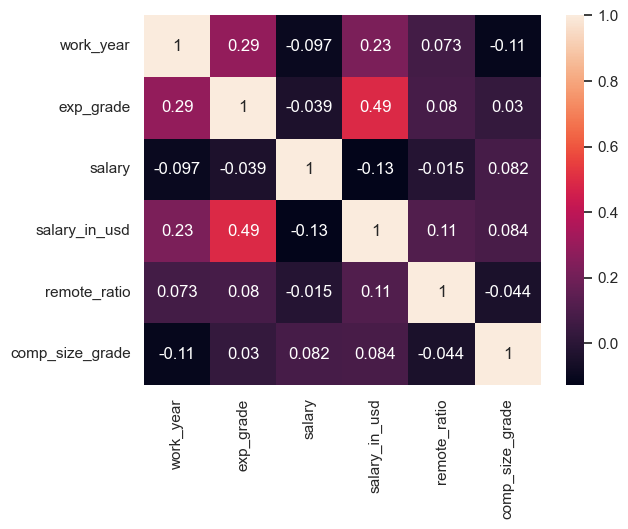

In [199]:
sns.heatmap(salary.corr(), annot = True)

In [234]:
salary.salary_in_usd.groupby(salary.company_size).describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,181.0,109956.138122,59878.003399,16228.0,62000.00,100000.0,151000.0,276000.0
M,311.0,118729.048232,53082.389850,18442.0,79395.50,115934.0,154500.0,266400.0
S,70.0,83328.842857,48982.685560,16904.0,50330.25,75916.5,104540.0,260000.0


Text(0, 0.5, 'Salary (USD)')

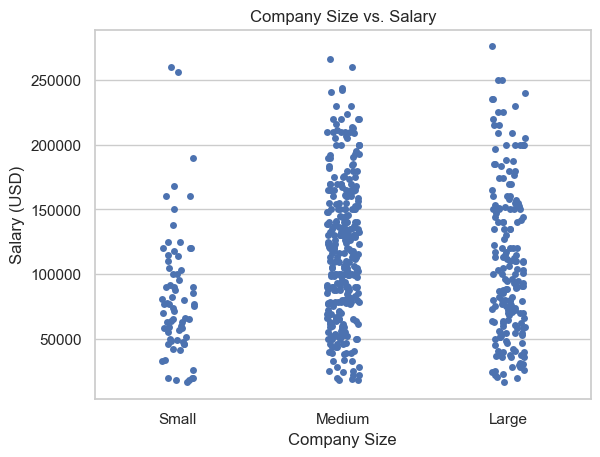

In [245]:
sns.stripplot(x = salary.comp_size_grade, y = salary.salary_in_usd)
plt.title('Company Size vs. Salary')
plt.xticks([0, 1, 2], ['Small', 'Medium', 'Large'])
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')

Text(0, 0.5, 'Salary (USD)')

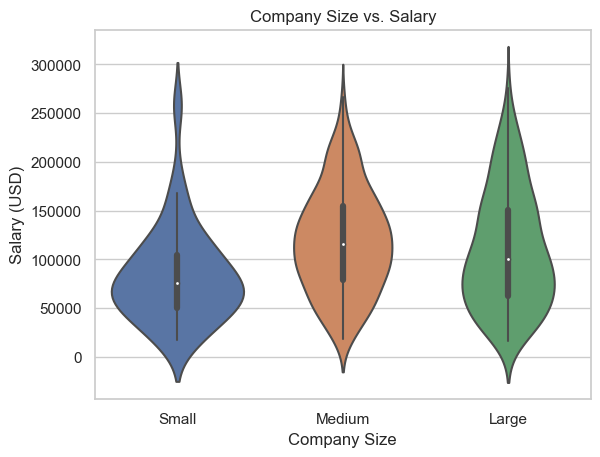

In [246]:
sns.violinplot(x = salary.comp_size_grade, y = salary.salary_in_usd)
plt.title('Company Size vs. Salary')
plt.xticks([0, 1, 2], ['Small', 'Medium', 'Large'])
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')

In [235]:
salary.salary_in_usd.groupby(salary.experience_level).describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,71.0,70814.169014,42474.417922,16228.0,43903.50,63831.0,90000.0,250000.0
EX,22.0,159963.318182,57623.570411,69741.0,121140.25,151833.5,212000.0,250000.0
MI,195.0,86292.169231,44670.106865,16904.0,51291.50,78526.0,112150.0,241000.0
SE,274.0,136079.715328,51172.300295,18907.0,100000.00,135000.0,170000.0,276000.0


Text(0, 0.5, 'Salary (USD)')

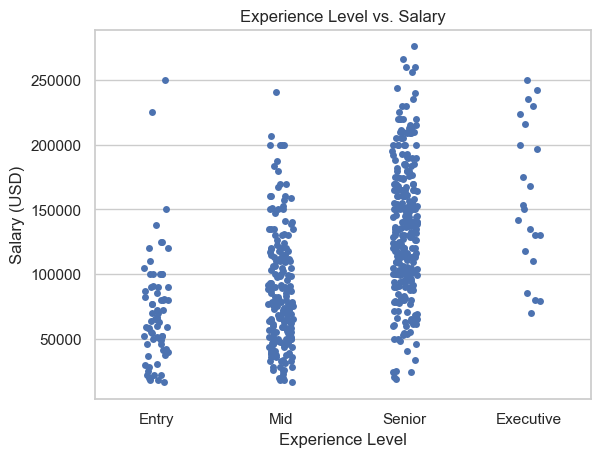

In [247]:
sns.stripplot(x = salary.exp_grade, y = salary.salary_in_usd)
plt.title('Experience Level vs. Salary')
plt.xticks([0, 1, 2, 3], ['Entry', 'Mid', 'Senior', 'Executive'])
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')

## Correlation and P-Values

In [206]:
salary.corr()

/var/folders/_j/fzbq3gvn0cx_99l539dvts7h0000gp/T/ipykernel_48695/3980231313.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  salary.corr()


,work_year,exp_grade,salary,salary_in_usd,remote_ratio,comp_size_grade
work_year,1.000000,0.286871,-0.096802,0.227026,0.072649,-0.112441
exp_grade,0.286871,1.000000,-0.038950,0.492488,0.080017,0.030135
salary,-0.096802,-0.038950,1.000000,-0.126964,-0.014729,0.081757
salary_in_usd,0.227026,0.492488,-0.126964,1.000000,0.114705,0.084405
remote_ratio,0.072649,0.080017,-0.014729,0.114705,1.000000,-0.043819
comp_size_grade,-0.112441,0.030135,0.081757,0.084405,-0.043819,1.000000


/var/folders/_j/fzbq3gvn0cx_99l539dvts7h0000gp/T/ipykernel_48695/707004254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(salary.corr(), annot = True)


<Axes: >

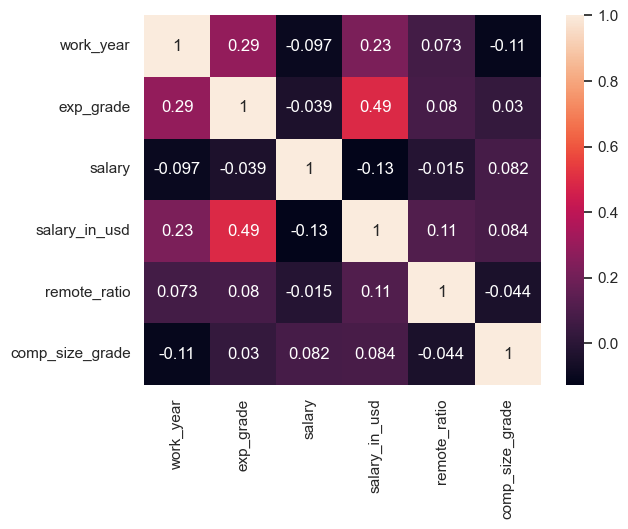

In [207]:
sns.heatmap(salary.corr(), annot = True)

In [208]:
spearmanr(salary.salary_in_usd, salary.remote_ratio)

SignificanceResult(statistic=0.15957555766505682, pvalue=0.00014532121691582348)

In [209]:
pearsonr(salary.salary_in_usd, salary.remote_ratio)

PearsonRResult(statistic=0.11470479619084578, pvalue=0.006485095943655529)

## Multivariate Analysis

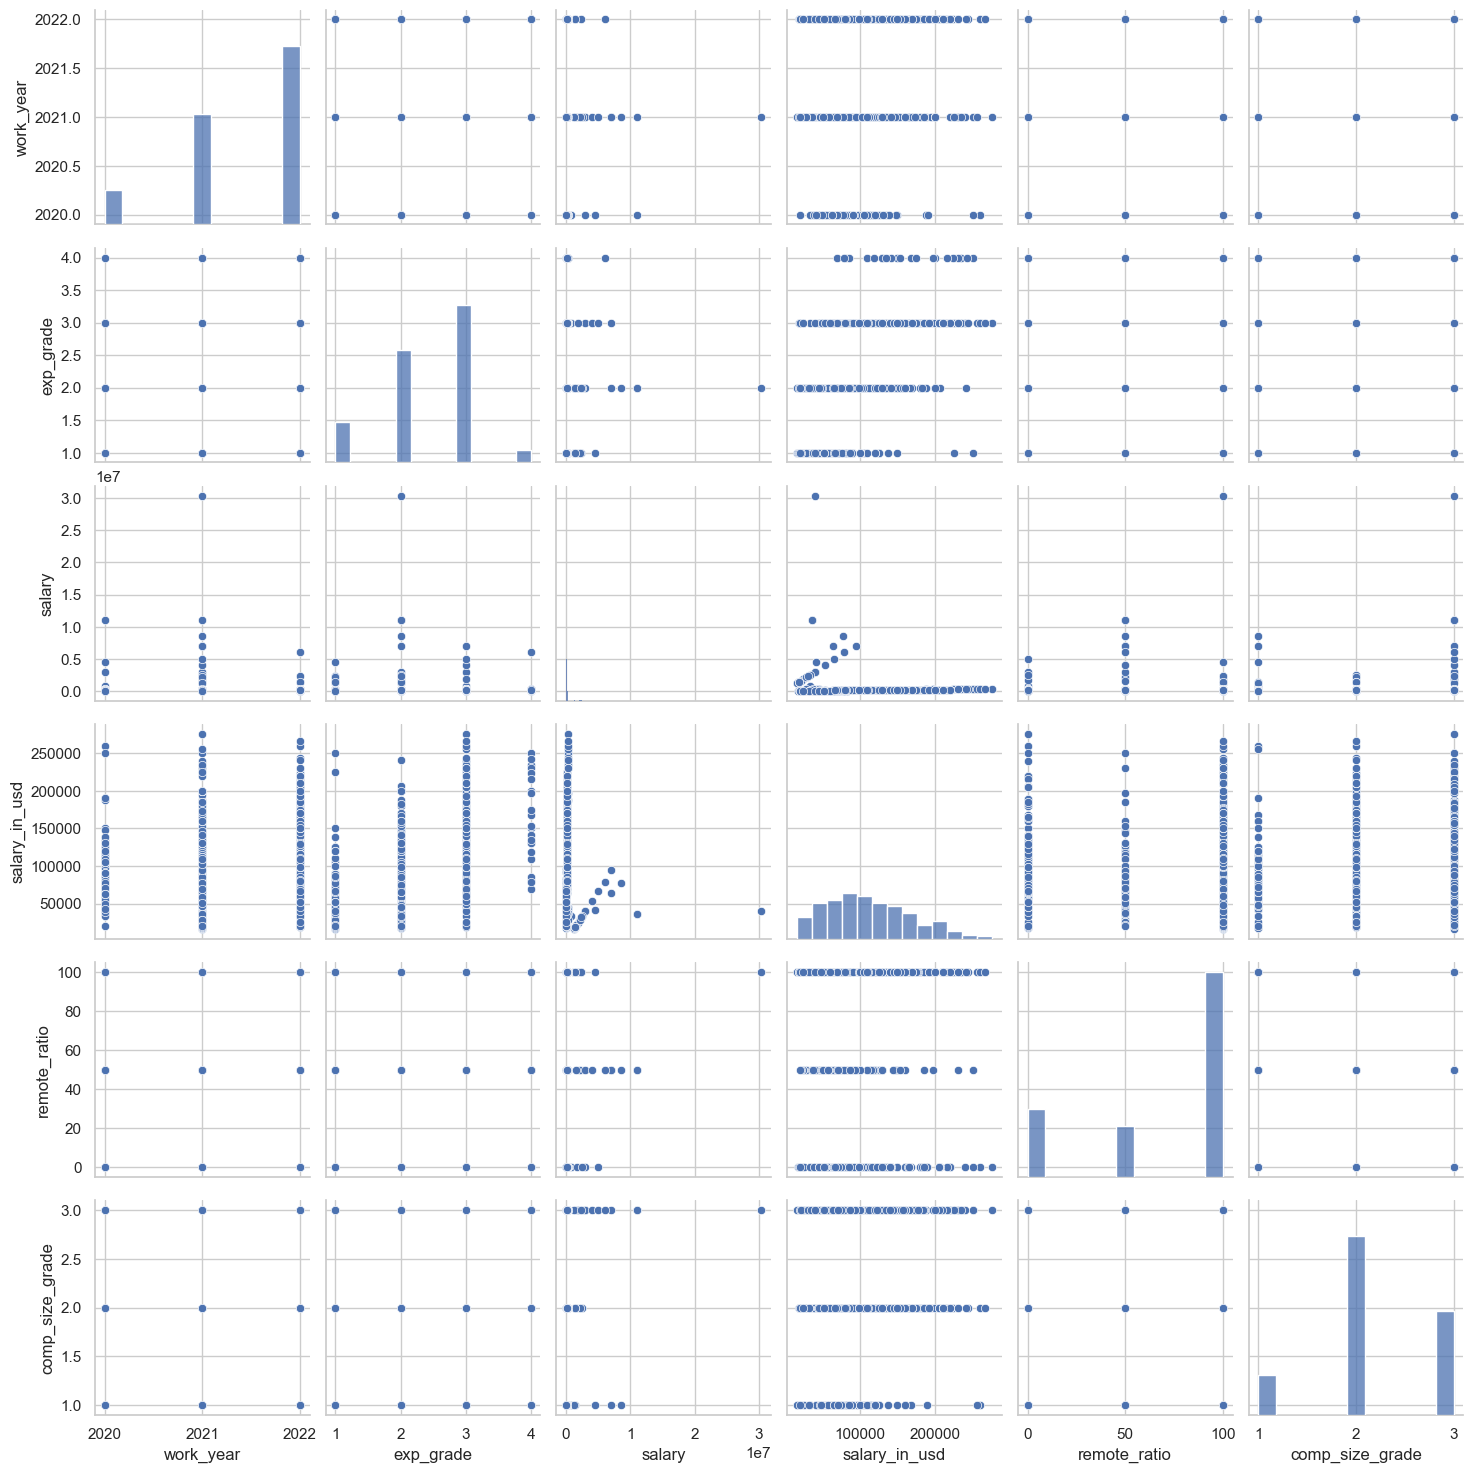

In [210]:
sns.pairplot(salary)

In [217]:
heatmap = pd.crosstab(index = salary.job_type, columns = salary.exp_grade, values = salary.salary_in_usd, aggfunc = np.mean).round(0)

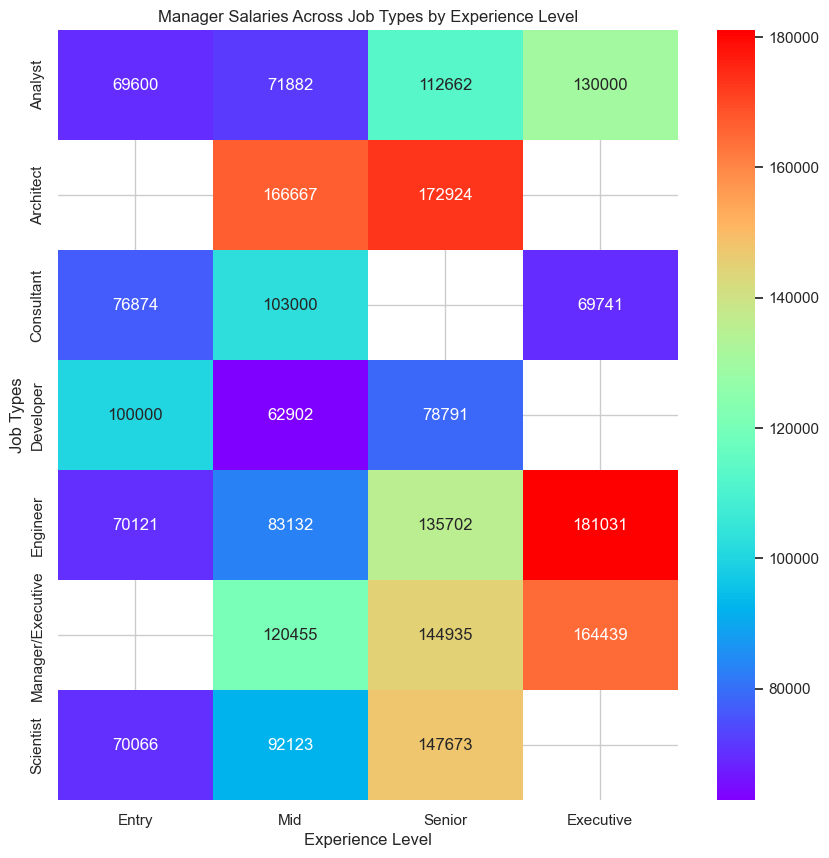

In [220]:
plt.figure(figsize=(10,10))

sns.heatmap(heatmap, annot = True, fmt = 'g', cmap = 'rainbow', xticklabels = ['Entry', 'Mid', "Senior", "Executive"])

plt.xlabel("Experience Level")
plt.ylabel("Job Types")

plt.title("Manager Salaries Across Job Types by Experience Level");